# Analysis of students going to college

The dataset used was gotten from kaggle at https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset

This analysis, visualization and model deployment was done by me on this synthetic dataset which aims to predict whether students will continue to go to school or not.

### Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\USER\Desktop\All python programs\archive (3)\data.csv")

### Expository Data Analysis

In [3]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [4]:
df.tail()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True
999,Academic,B,Male,Quiet Interested,Urban,50,2940000,69.1,86.13,True,False


In [5]:
df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [6]:
df['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [7]:
df['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [8]:
df['gender'].value_counts()

Male      515
Female    485
Name: gender, dtype: int64

In [9]:
df['interest'].value_counts()

Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64

In [10]:
df['residence'].value_counts()

Urban    539
Rural    461
Name: residence, dtype: int64

In [11]:
df['in_college'].value_counts()

True     500
False    500
Name: in_college, dtype: int64

In [12]:
df.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

### Data Visualizations

<AxesSubplot:>

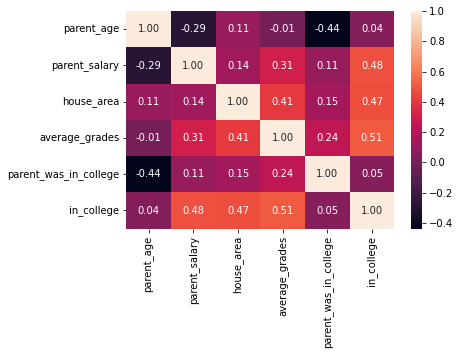

In [13]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

#### Visualizations of features of students not going to college

<AxesSubplot:xlabel='parent_was_in_college', ylabel='count'>

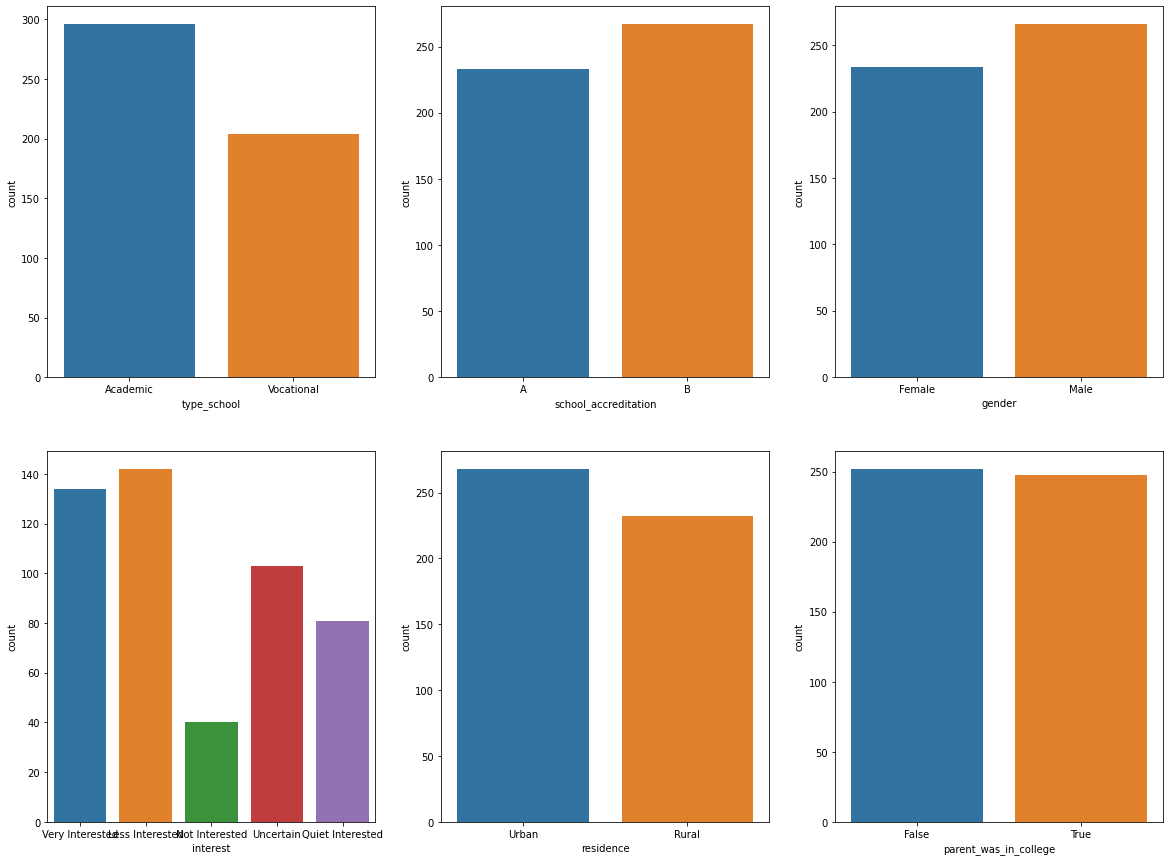

In [14]:
fig, axes = plt.subplots(2,3,figsize=(20,15))
sns.countplot(x='type_school',data=df[df['in_college']==False],ax=axes[0,0])
sns.countplot(x='school_accreditation',data=df[df['in_college']==False],ax=axes[0,1])
sns.countplot(x='gender',data=df[df['in_college']==False],ax=axes[0,2])
sns.countplot(x='interest',data=df[df['in_college']==False],ax=axes[1,0])
sns.countplot(x='residence',data=df[df['in_college']==False],ax=axes[1,1])
sns.countplot(x='parent_was_in_college',data=df[df['in_college']==False],ax=axes[1,2])

<AxesSubplot:xlabel='average_grades', ylabel='Count'>

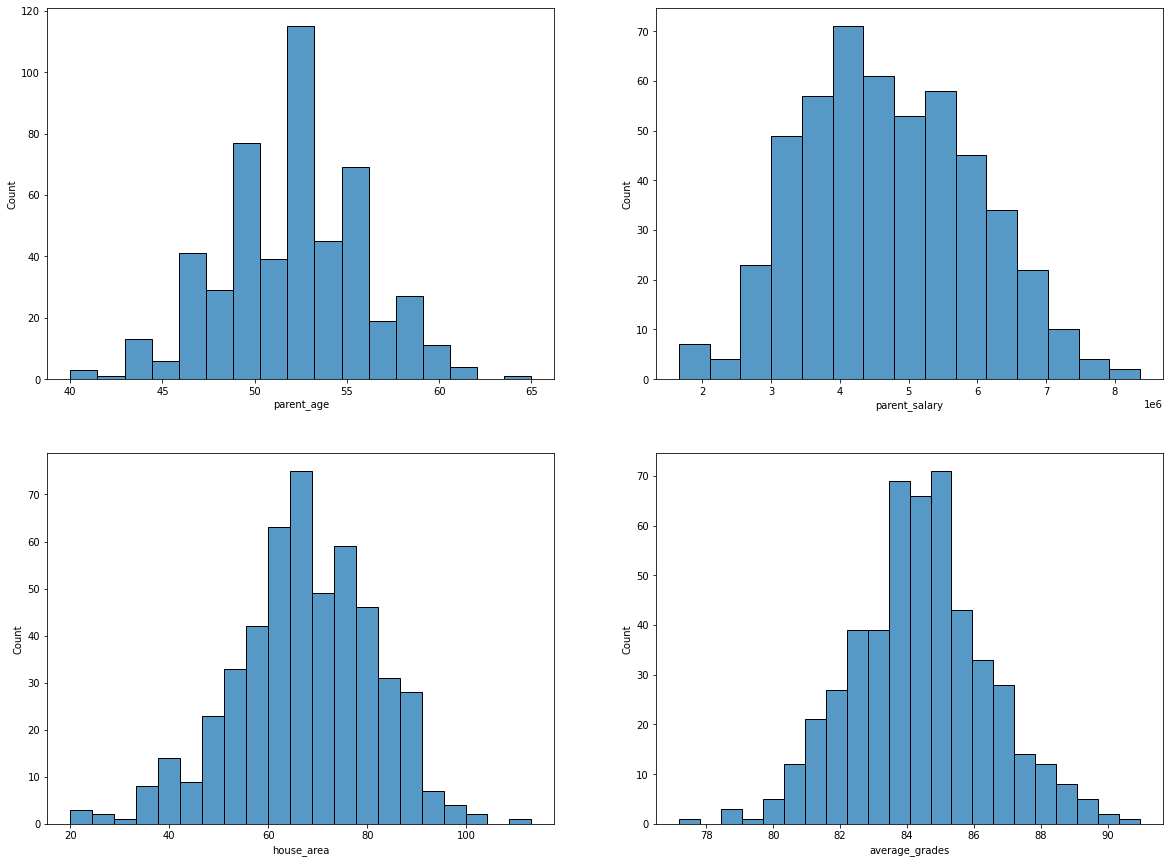

In [15]:
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.histplot(x='parent_age',data=df[df['in_college']==False],ax=axes[0,0])
sns.histplot(x='parent_salary',data=df[df['in_college']==False],ax=axes[0,1])
sns.histplot(x='house_area',data=df[df['in_college']==False],ax=axes[1,0])
sns.histplot(x='average_grades',data=df[df['in_college']==False],ax=axes[1,1])

#### Visualizations of features of students going to college

<AxesSubplot:xlabel='parent_was_in_college', ylabel='count'>

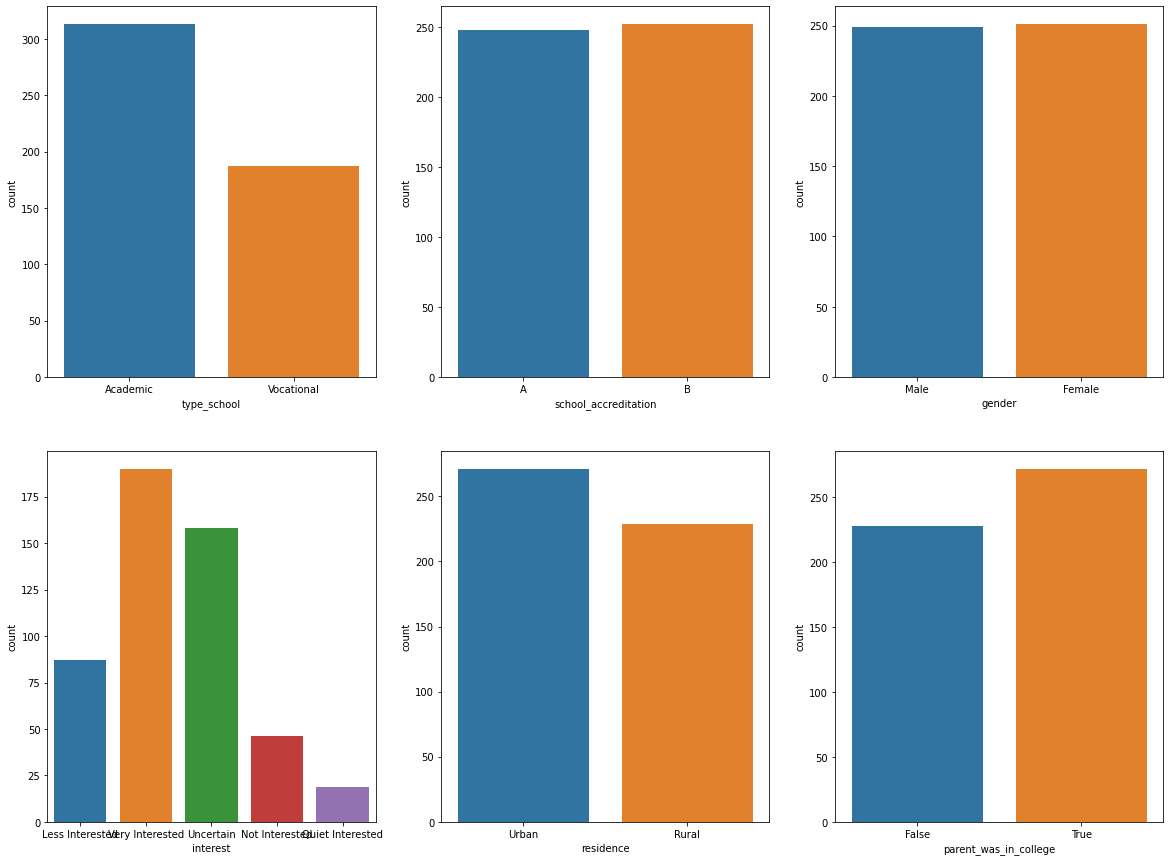

In [16]:
fig, axes = plt.subplots(2,3,figsize=(20,15))
sns.countplot(x='type_school',data=df[df['in_college']==True],ax=axes[0,0])
sns.countplot(x='school_accreditation',data=df[df['in_college']==True],ax=axes[0,1])
sns.countplot(x='gender',data=df[df['in_college']==True],ax=axes[0,2])
sns.countplot(x='interest',data=df[df['in_college']==True],ax=axes[1,0])
sns.countplot(x='residence',data=df[df['in_college']==True],ax=axes[1,1])
sns.countplot(x='parent_was_in_college',data=df[df['in_college']==True],ax=axes[1,2])

<AxesSubplot:xlabel='average_grades', ylabel='Count'>

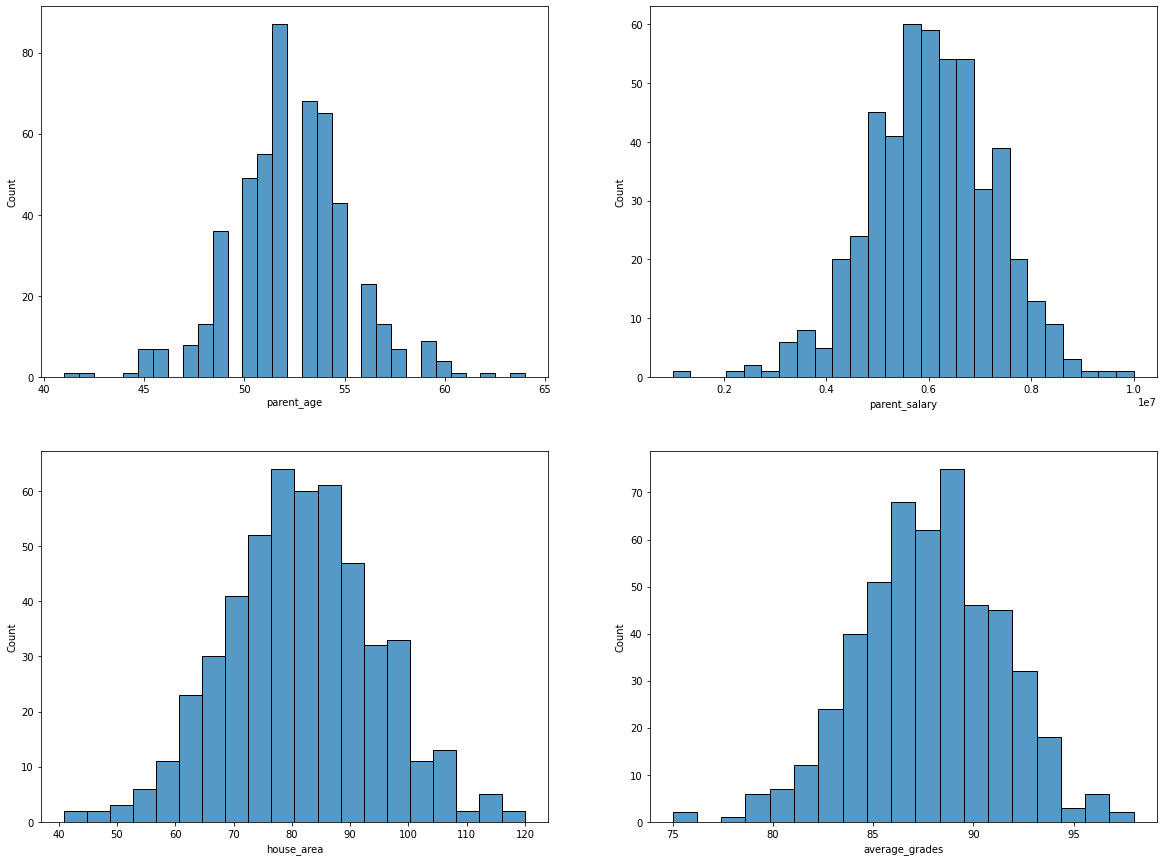

In [17]:
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.histplot(x='parent_age',data=df[df['in_college']==True],ax=axes[0,0])
sns.histplot(x='parent_salary',data=df[df['in_college']==True],ax=axes[0,1])
sns.histplot(x='house_area',data=df[df['in_college']==True],ax=axes[1,0])
sns.histplot(x='average_grades',data=df[df['in_college']==True],ax=axes[1,1])

#### Visualization of general data

<AxesSubplot:xlabel='parent_was_in_college', ylabel='count'>

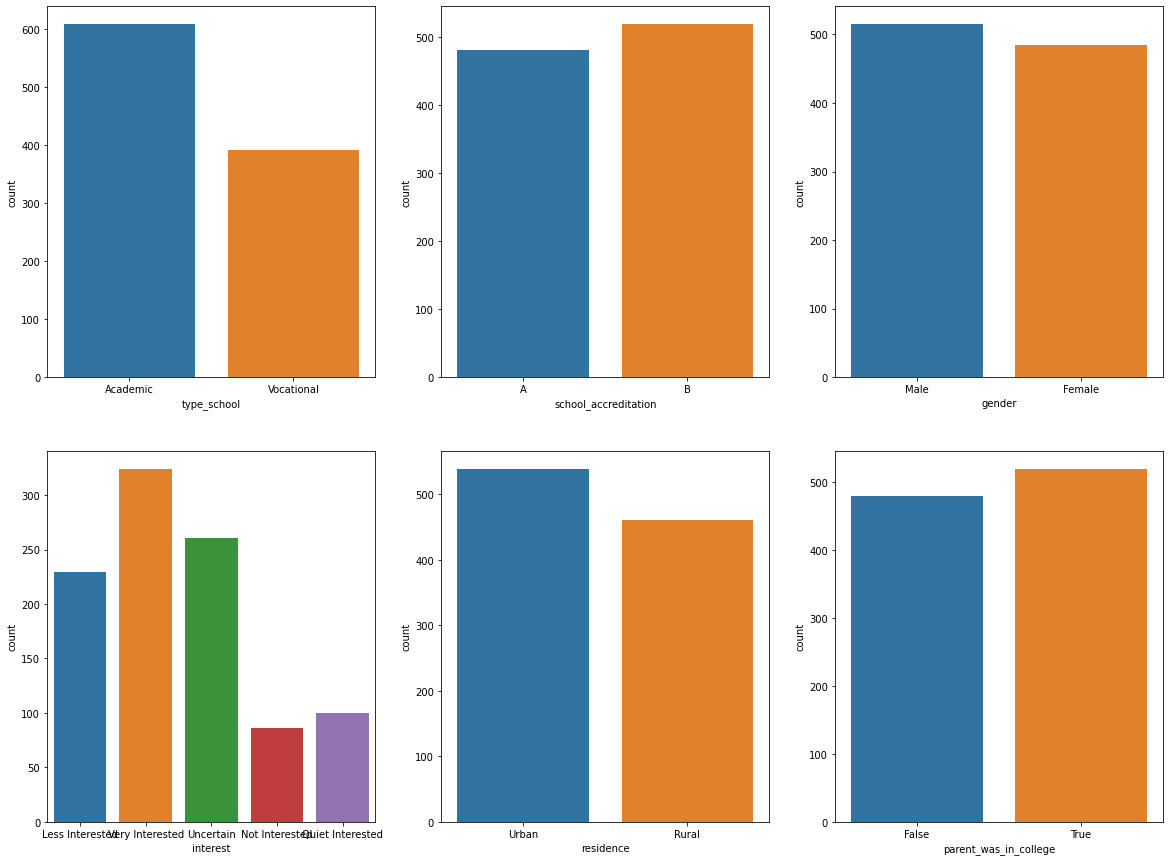

In [18]:
fig, axes = plt.subplots(2,3,figsize=(20,15))
sns.countplot(x='type_school',data=df,ax=axes[0,0])
sns.countplot(x='school_accreditation',data=df,ax=axes[0,1])
sns.countplot(x='gender',data=df,ax=axes[0,2])
sns.countplot(x='interest',data=df,ax=axes[1,0])
sns.countplot(x='residence',data=df,ax=axes[1,1])
sns.countplot(x='parent_was_in_college',data=df,ax=axes[1,2])

<AxesSubplot:xlabel='average_grades', ylabel='Count'>

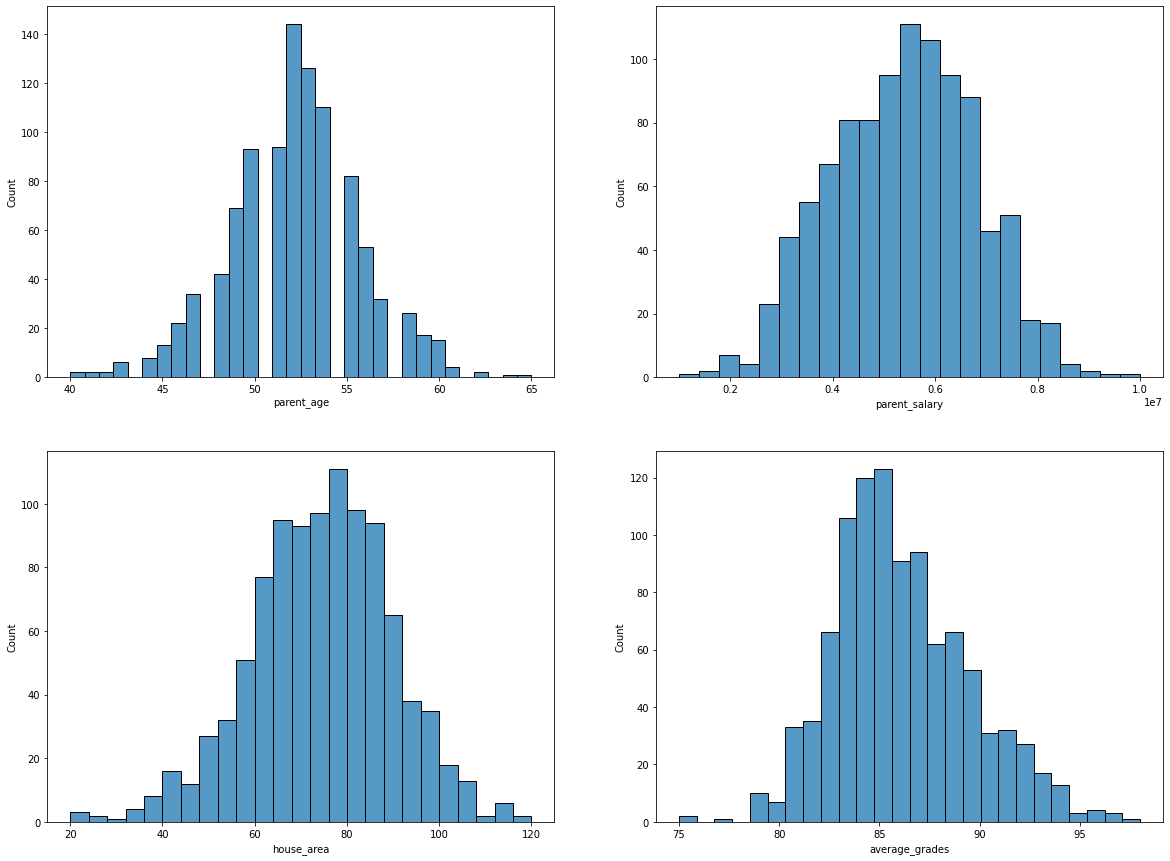

In [19]:
fig, axes = plt.subplots(2,2,figsize=(20,15))
sns.histplot(x='parent_age',data=df,ax=axes[0,0])
sns.histplot(x='parent_salary',data=df,ax=axes[0,1])
sns.histplot(x='house_area',data=df,ax=axes[1,0])
sns.histplot(x='average_grades',data=df,ax=axes[1,1])

<AxesSubplot:ylabel='average_grades'>

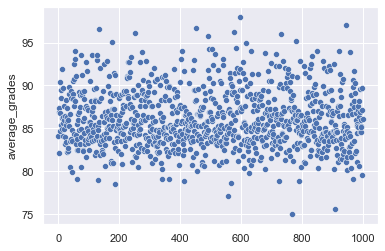

In [20]:
sns.set()
sns.scatterplot(df['average_grades'])

<AxesSubplot:ylabel='house_area'>

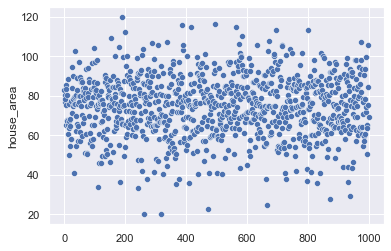

In [21]:
sns.scatterplot(df['house_area'])

<AxesSubplot:xlabel='in_college', ylabel='count'>

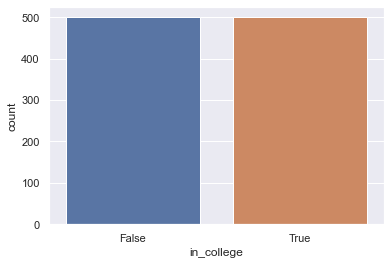

In [22]:
sns.countplot(x='in_college',data=df)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


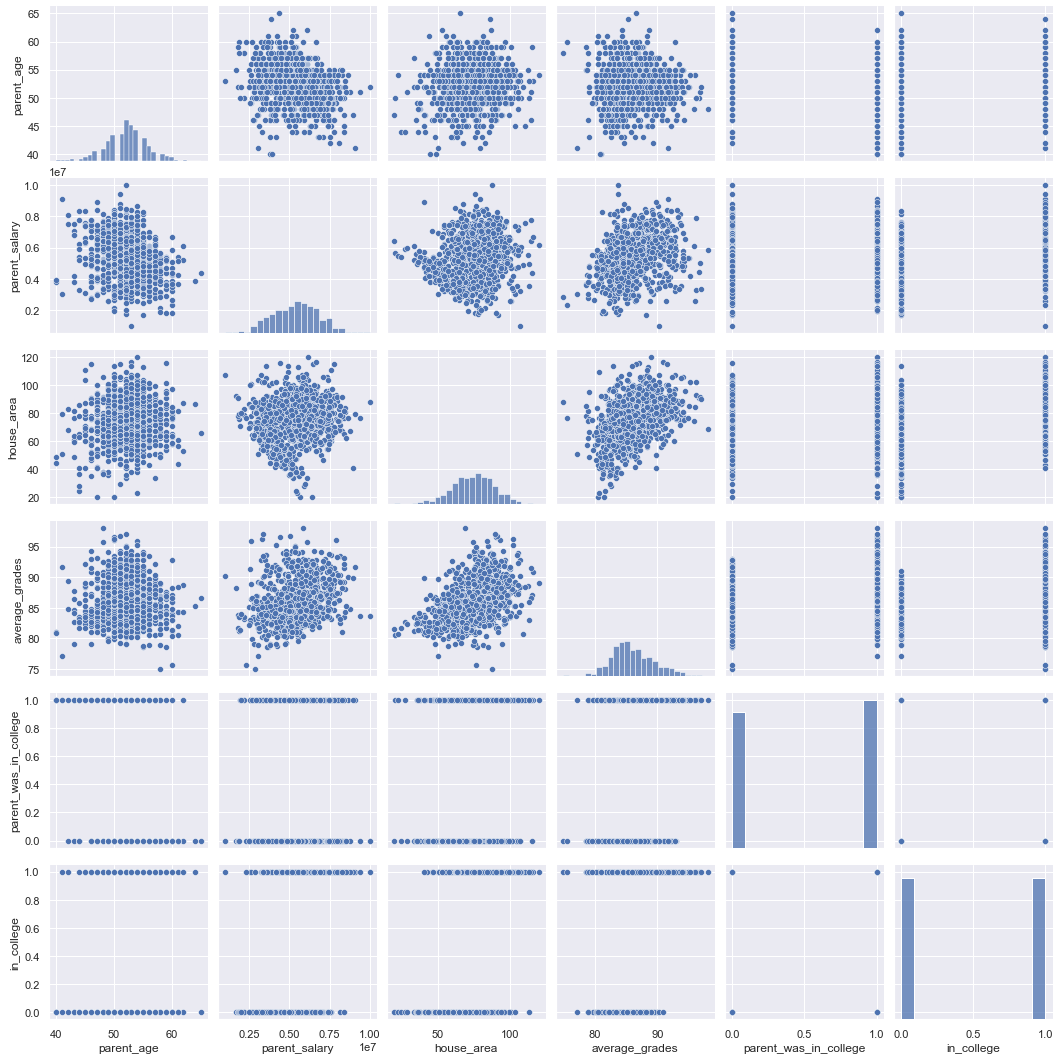

In [23]:
sns.pairplot(df)

### Data preprocessing and model building

In [24]:
x=df.drop(['in_college','house_area'],axis=1)
y=df['in_college']

In [25]:
x['type_school'].value_counts(),x['school_accreditation'].value_counts(),x['gender'].value_counts(),x['interest'].value_counts(),x['residence'].value_counts(),x['parent_was_in_college'].value_counts()

(Academic      609
 Vocational    391
 Name: type_school, dtype: int64,
 B    519
 A    481
 Name: school_accreditation, dtype: int64,
 Male      515
 Female    485
 Name: gender, dtype: int64,
 Very Interested     324
 Uncertain           261
 Less Interested     229
 Quiet Interested    100
 Not Interested       86
 Name: interest, dtype: int64,
 Urban    539
 Rural    461
 Name: residence, dtype: int64,
 True     520
 False    480
 Name: parent_was_in_college, dtype: int64)

In [26]:
def category_val(df,col):
    df[col]=df[col].astype('category')
    df[col]=df[col].cat.codes
    return df[col]
x['type_school']= category_val(x,'type_school')
x['school_accreditation']=category_val(x,'school_accreditation')
x['gender']=category_val(x,'gender')
x['interest']=category_val(x,'interest')
x['residence']= category_val(x,'residence')
x['parent_was_in_college']= category_val(x,'parent_was_in_college')

x['type_school'].value_counts(),x['school_accreditation'].value_counts(),x['gender'].value_counts(),x['interest'].value_counts(),x['residence'].value_counts(),x['parent_was_in_college'].value_counts()

(0    609
 1    391
 Name: type_school, dtype: int64,
 1    519
 0    481
 Name: school_accreditation, dtype: int64,
 1    515
 0    485
 Name: gender, dtype: int64,
 4    324
 3    261
 0    229
 2    100
 1     86
 Name: interest, dtype: int64,
 1    539
 0    461
 Name: residence, dtype: int64,
 1    520
 0    480
 Name: parent_was_in_college, dtype: int64)

In [27]:
model=LogisticRegression(solver='liblinear')

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [30]:
model.score(x_test,y_test)

0.49666666666666665

In [31]:
dt=DecisionTreeClassifier()

In [32]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dt.score(x_test,y_test)

0.79

In [34]:
rf=RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rf.score(x_test,y_test)

0.8433333333333334

In [37]:
y_pred=rf.predict(x_test)

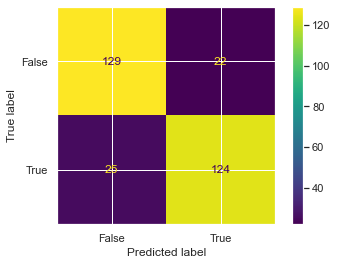

In [38]:
y_pred=rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=rf.classes_)

In [39]:
confusion_matrix(y_test,y_pred)

array([[129,  22],
       [ 25, 124]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.84      0.85      0.85       151
        True       0.85      0.83      0.84       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [41]:
pickle.dump(rf,open("college_std.pkl","wb"))